In [1]:
import tensorflow as tf
from tensorflow import keras

In [2]:
import matplotlib.pyplot as plt

In [3]:
import tensorflow.keras.datasets.mnist as mnist

In [4]:
import numpy as np

#### Load data from MNIST

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#### Normalise

In [6]:
# Value is between 1 and 255 so dividing X_train (as x_train only contains images)these by Maximum number (255) 
x_train = x_train/255.0

In [7]:
# Array containing final predictions to be
class_ = np.array([0,1,2,3,4,5,6,7,8,9])

In [8]:
# check the input shape for our model

x_train.shape

(60000, 28, 28)

### Create a model 

In [9]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28,28)),
        tf.keras.layers.Dense(784, activation = 'relu'),
        tf.keras.layers.Dense((784), activation = 'relu'),                
        tf.keras.layers.Dense(10)
]) 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


### Train the model

In [10]:
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
model.fit(x_train,y_train,epochs=5) 

Epoch 1/5
60000/60000 [==============================] - 20s 339us/sample - loss: 0.1813 - acc: 0.9452
Epoch 2/5
60000/60000 [==============================] - 20s 329us/sample - loss: 0.0793 - acc: 0.9759
Epoch 3/5
60000/60000 [==============================] - 20s 329us/sample - loss: 0.0583 - acc: 0.9816
Epoch 4/5
60000/60000 [==============================] - 20s 327us/sample - loss: 0.0443 - acc: 0.9858
Epoch 5/5
60000/60000 [==============================] - 20s 327us/sample - loss: 0.0355 - acc: 0.9885


#### Evaluate our trained model

In [12]:
model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 1s - loss: 19.3197 - acc: 0.9788


[19.319683255804982, 0.9788]

### Predict

In [16]:
# Adding Softmax() layer in our trained model

probability_model = tf.keras.models.Sequential([ 
                    model,
                    tf.keras.layers.Softmax()])

# Predicting x_test

predictions = probability_model.predict(x_test)

In [17]:
predictions.shape

(10000, 10)

0

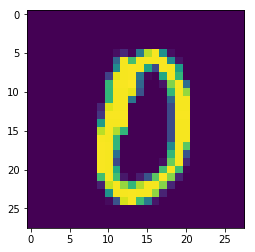

In [18]:
# checking our predictions by comparing to the input provided while prediction

index = 55
plt.imshow(x_test[index]) # input provided  while prediction
class_[np.argmax(predictions[index])] # our prediction

### Predict for only one input

In [166]:
test_pc = x_train[3]

In [158]:
# Check the input shape to the initial input
test_pc.shape

(28, 28)

In [160]:
# initial input shape
x_train.shape

(60000, 28, 28)

In [167]:
# Resize out input to the initial shape
# Our input is numpy, so we use numpy.resize()
test_pc_resized = np.resize(test_pc,(1,28,28))

In [162]:
# check shape of our input
test_pc_resized.shape

(1, 28, 28)

### Now predict

In [168]:
pred = probability_model.predict(test_pc_resized)

In [164]:
pred

array([[6.5893169e-20, 1.7064769e-16, 1.6850743e-13, 4.9943517e-21,
        1.3011926e-18, 3.4174254e-19, 2.0673651e-33, 1.0000000e+00,
        6.4614556e-18, 7.9053958e-10]], dtype=float32)

In [169]:
# Now check for maximum probability by passing it to numpy's argmax() 
final_prid = class_[np.argmax(pred)]
final_prid

1